# Clustering Velib

In [54]:
library(mclust)
library(cluster)
library(factoextra)
library(FactoMineR)
library(ppclust)
library(reticulate)
library(ggplot2)
library(reshape)
library(corrplot)
library(gridExtra)
library(circlize)
library(tidyverse)
library(ggpubr)

In [4]:
load("velib.RData")
# data preparation
x <- as.matrix(velib$data)
colnames(x) <- 1:ncol(x)
rownames(x) <- velib$names

n <- nrow(x)
stations <- 1:n 
coord <- velib$position[stations,]

# select exactly 7 days of data (we remove the first 13 dates)
dates <- 14:181
x <- x[stations, dates]
colnames(x) <- 1:length(dates)

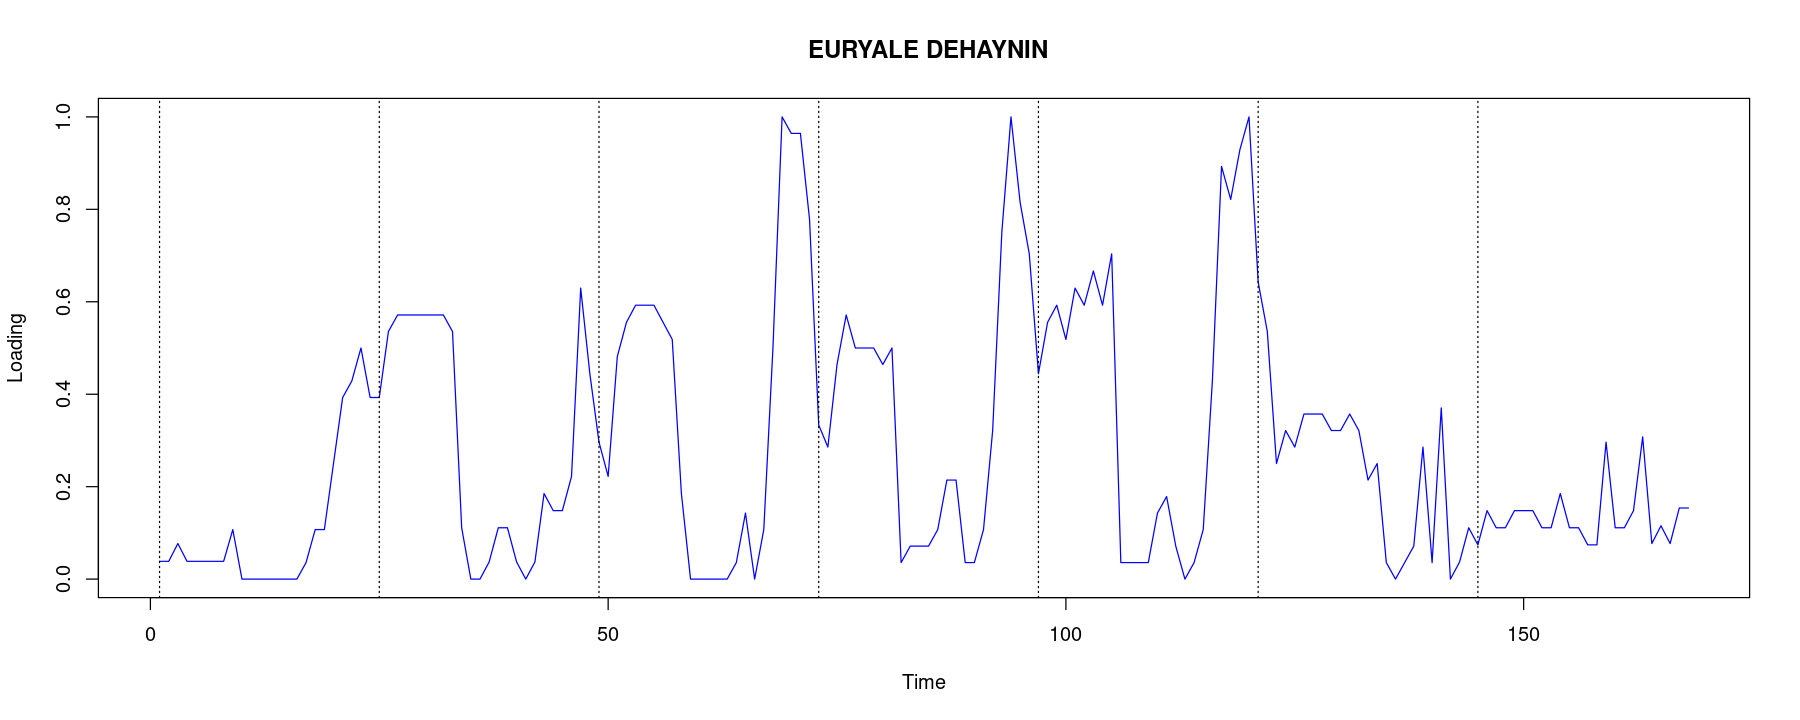

In [5]:
timeTick <- 1 + 24*(0:6)  # vector corresponding to the beginning of days
par(mfrow = c(1, 1))

options(repr.plot.width = 15, repr.plot.height = 6)

plot(x[1, ], col = "blue", type = "l", ylim = c(0, 1), 
     xlab = "Time", ylab = "Loading", main = rownames(x)[1])
abline(v = timeTick, lty = "dotted")

In [ ]:
# From now on, we use numbers instead of station names, 
# in order to simplify printing
rownames(x) <- 1:nrow(x)

In [7]:
head(velib)

$data
              V1         V2         V3         V4         V5         V6
19117 0.07692308 0.26923077 0.38461538 0.23076923 0.15384615 0.15384615
17111 0.04347826 0.00000000 0.13043478 0.08695652 0.17391304 0.08695652
6103  0.10909091 0.12727273 0.12727273 0.18181818 0.14545455 0.10909091
15042 0.57142857 0.52380952 0.66666667 0.71428571 0.80952381 1.00000000
12003 1.00000000 0.94202899 1.00000000 0.98550725 1.00000000 1.00000000
13038 0.41666667 0.08333333 0.20833333 0.25000000 0.12500000 0.20833333
17041 0.58974359 0.46153846 0.33333333 0.33333333 0.33333333 0.17948718
41203 0.27450980 0.21568627 0.23529412 0.23529412 0.21568627 0.23529412
43401 0.97777778 1.00000000 1.00000000 0.95555556 0.97777778 0.86666667
5015  0.84126984 0.79365079 0.80952381 0.74603175 0.77777778 0.74603175
20026 0.03030303 0.00000000 0.00000000 0.00000000 0.00000000 0.03030303
12127 1.00000000 0.97142857 0.97142857 0.94285714 0.97142857 1.00000000
1014  0.60000000 0.76000000 0.75000000 0.96000000 1.00000000 1.00000000
18108 0.23809524 0.19047619 0.09523810 0.09523810 0.04761905 0.09523810
18112 0.08000000 0.00000000 0.04000000 0.08000000 0.00000000 0.00000000
17045 0.07142857 0.21428571 0.21428571 0.04761905 0.04651163 0.09302326
3010  0.16666667 0.55555556 0.61111111 0.88888889 0.88888889 1.00000000
20011 0.09523810 0.04761905 0.00000000 0.00000000 0.00000000 0.09523810
4020  0.39285714 0.53571429 0.39285714 0.21428571 0.39285714 0.11111111
42504 0.36666667 0.33333333 0.36666667 0.33333333 0.30000000 0.33333333
3001  0.78431373 0.96078431 0.98039216 0.92156863 0.88235294 0.92156863
4002  1.00000000 1.00000000 1.00000000 1.00000000 1.00000000 0.79166667
8033  0.18518519 0.14814815 0.18518519 0.07407407 0.07407407 0.07407407
17023 0.33333333 0.16666667 0.25000000 0.19444444 0.02777778 0.02777778
17026 1.00000000 0.87804878 0.87804878 0.73170732 0.65853659 0.60975610
20131 0.03030303 0.15151515 0.12121212 0.03030303 0.09090909 0.06060606
6007  0.13043478 0.08695652 0.04347826 0.21739130 0.00000000 0.04347826
3012  0.43478261 0.52173913 0.34782609 0.21739130 0.08695652 0.30434783
18044 0.00000000 0.03125000 0.00000000 0.00000000 0.00000000 0.00000000
8113  0.15000000 0.20000000 0.10000000 0.05000000 0.10000000 0.10000000
14103 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
16105 0.19354839 0.12903226 0.09677419 0.03225806 0.06451613 0.06451613
15020 1.00000000 1.00000000 0.87500000 1.00000000 0.90625000 0.93750000
15106 0.89552239 1.00000000 0.97014925 0.85074627 0.88059701 0.95522388
35010 0.12500000 0.04166667 0.08333333 0.04166667 0.04166667 0.04166667
15044 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
21210 0.00000000 0.00000000 0.09375000 0.06250000 0.00000000 0.00000000
15035 1.00000000 0.88095238 0.97619048 0.95238095 1.00000000 0.73809524
21502 0.04000000 0.08000000 0.04000000 0.04000000 0.16000000 0.04000000
31003 0.43333333 0.43333333 0.43333333 0.50000000 0.56666667 0.56666667
10005 0.35294118 0.29411765 0.23529412 0.23529412 0.23529412 0.17647059
6016  0.47619048 0.66666667 0.80952381 1.00000000 1.00000000 1.00000000
19018 0.39622642 0.24528302 0.09615385 0.19230769 0.07692308 0.23529412
4011  0.75757576 0.66666667 0.76470588 1.00000000 0.97142857 0.97058824
31709 0.13043478 0.13043478 0.21739130 0.17391304 0.13043478 0.13043478
19121 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
10042 0.33333333 0.39393939 0.18181818 0.15151515 0.12121212 0.09090909
15118 0.22727273 0.22727273 0.22727273 0.18181818 0.22727273 0.54545455
15064 0.97777778 0.95555556 0.93333333 1.00000000 0.91111111 0.84444444
3011  0.06666667 0.06896552 0.03333333 0.13333333 0.33333333 0.40000000
18028 0.06060606 0.03030303 0.00000000 0.00000000 0.03030303 0.00000000
12032 0.85714286 0.97142857 0.42857143 0.51428571 0.65714286 0.94285714
17011 0.55555556 0.64814815 0.72222222 0.72222222 0.74074074 0.70370370
15105 0.87500000 1.00000000 0.95833333 0.87500000 0.95833333 0.95833333
13045 0.25000000 0.30000000 0.1000

## Clustering k-means

In [18]:
#Données normalisées
velib2 <- cbind(x,velib$bonus) #rajoute la colonne bonus à velib : sert à rien si on la supprime après si? car qualitative
#velib2=cbind(velib2,)
head(velib2)

1          2          3          4          5         
 EURYALE DEHAYNIN    0.03846154 0.03846154 0.07692308 0.03846154 0.03846154
 LEMERCIER           0.47826087 0.47826087 0.47826087 0.43478261 0.43478261
 MEZIERES RENNES     0.21818182 0.14545455 0.12727273 0.10909091 0.10909091
 FARMAN              0.95238095 0.95238095 0.95238095 0.95238095 0.95238095
 QUAI DE LA RAPEE    0.92753623 0.81159420 0.73913043 0.72463768 0.72463768
 CHOISY POINT D'IVRY 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
                     6          7          8          9          10         ⋯
 EURYALE DEHAYNIN    0.03846154 0.03846154 0.03846154 0.10714286 0.00000000 ⋯
 LEMERCIER           0.43478261 0.43478261 0.43478261 0.26086957 0.04347826 ⋯
 MEZIERES RENNES     0.10909091 0.09090909 0.09090909 0.05454545 0.10909091 ⋯
 FARMAN              0.95238095 0.95238095 1.00000000 1.00000000 1.00000000 ⋯
 QUAI DE LA RAPEE    0.72463768 0.72463768 0.72463768 0.75362319 0.97101449 ⋯
 CHOISY POINT D'IVRY 0.16666667 0.16666667 0.16666667 0.08333333 0.00000000 ⋯
                     160        161       162        163        164       
 EURYALE DEHAYNIN    0.11111111 0.1111111 0.14814815 0.30769231 0.07692308
 LEMERCIER           0.00000000 0.2173913 0.13043478 0.04545455 0.17391304
 MEZIERES RENNES     0.25925926 0.2037037 0.12962963 0.14814815 0.29629630
 FARMAN              1.00000000 0.9047619 0.85714286 0.85714286 0.85714286
 QUAI DE LA RAPEE    0.45454545 0.5909091 0.83333333 1.00000000 0.81818182
 CHOISY POINT D'IVRY 0.08695652 0.1153846 0.08695652 0.13043478 0.08695652
                     165        166        167       168        
 EURYALE DEHAYNIN    0.11538462 0.07692308 0.1538462 0.1538462 0
 LEMERCIER           0.17391304 0.17391304 0.2608696 0.3913043 0
 MEZIERES RENNES     0.31481481 0.37037037 0.3703704 0.4074074 0
 FARMAN              0.76190476 0.76190476 0.7619048 0.7619048 0
 QUAI DE LA RAPEE    0.63636364 0.71212121 0.6212121 0.5757576 0
 CHOISY POINT D'IVRY 0.08695652 0.43478261 0.3913043 0.5217391 0

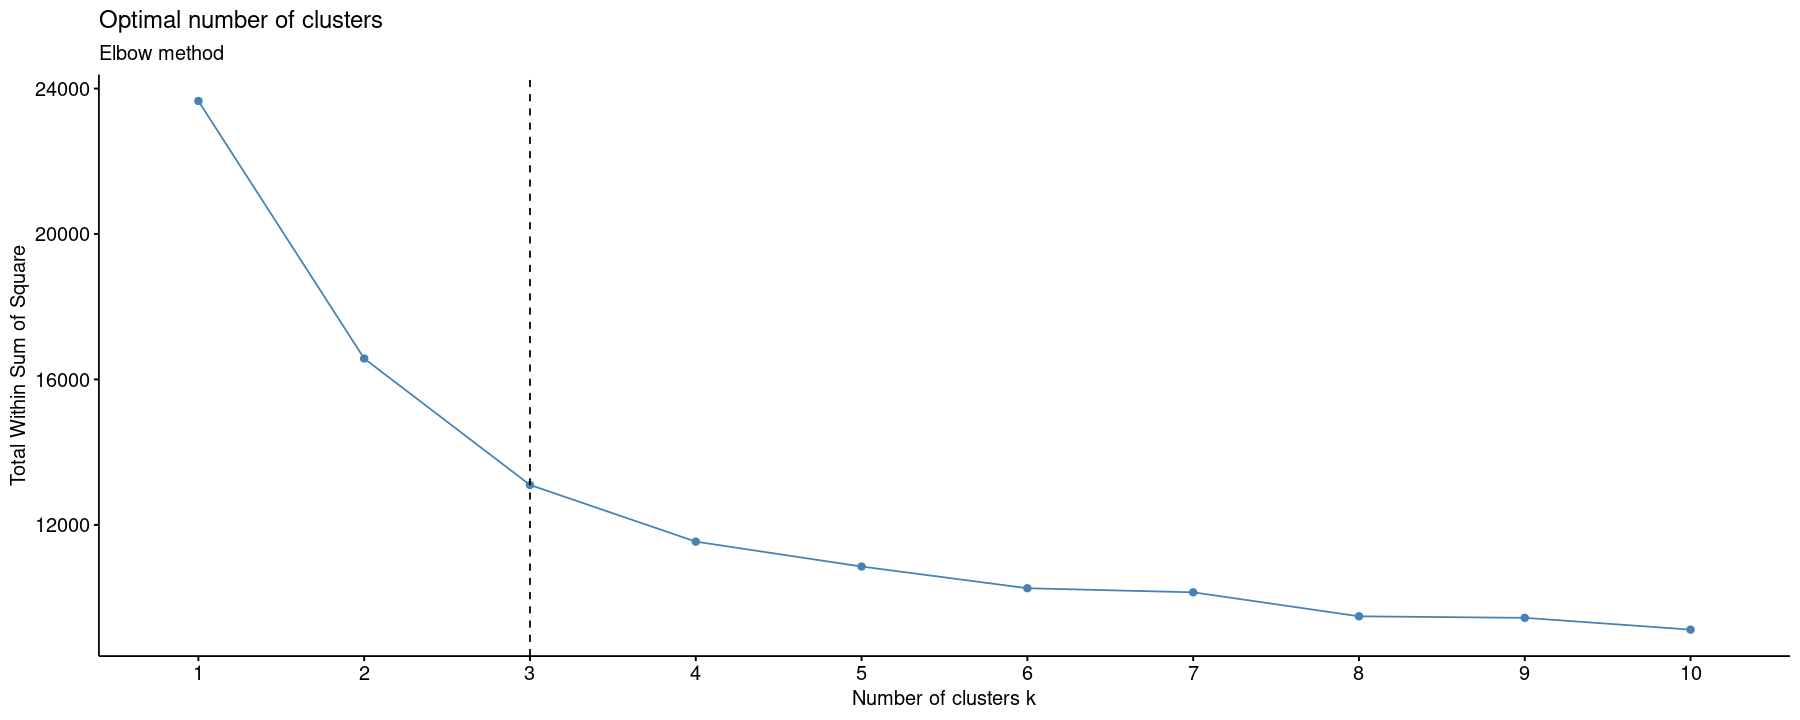

In [60]:
library(factoextra)
library(NbClust)
# Elbow method
fviz_nbclust(velib2[,-169], kmeans, method = "wss") +
    geom_vline(xintercept = 3, linetype = 2)+
  labs(subtitle = "Elbow method") 

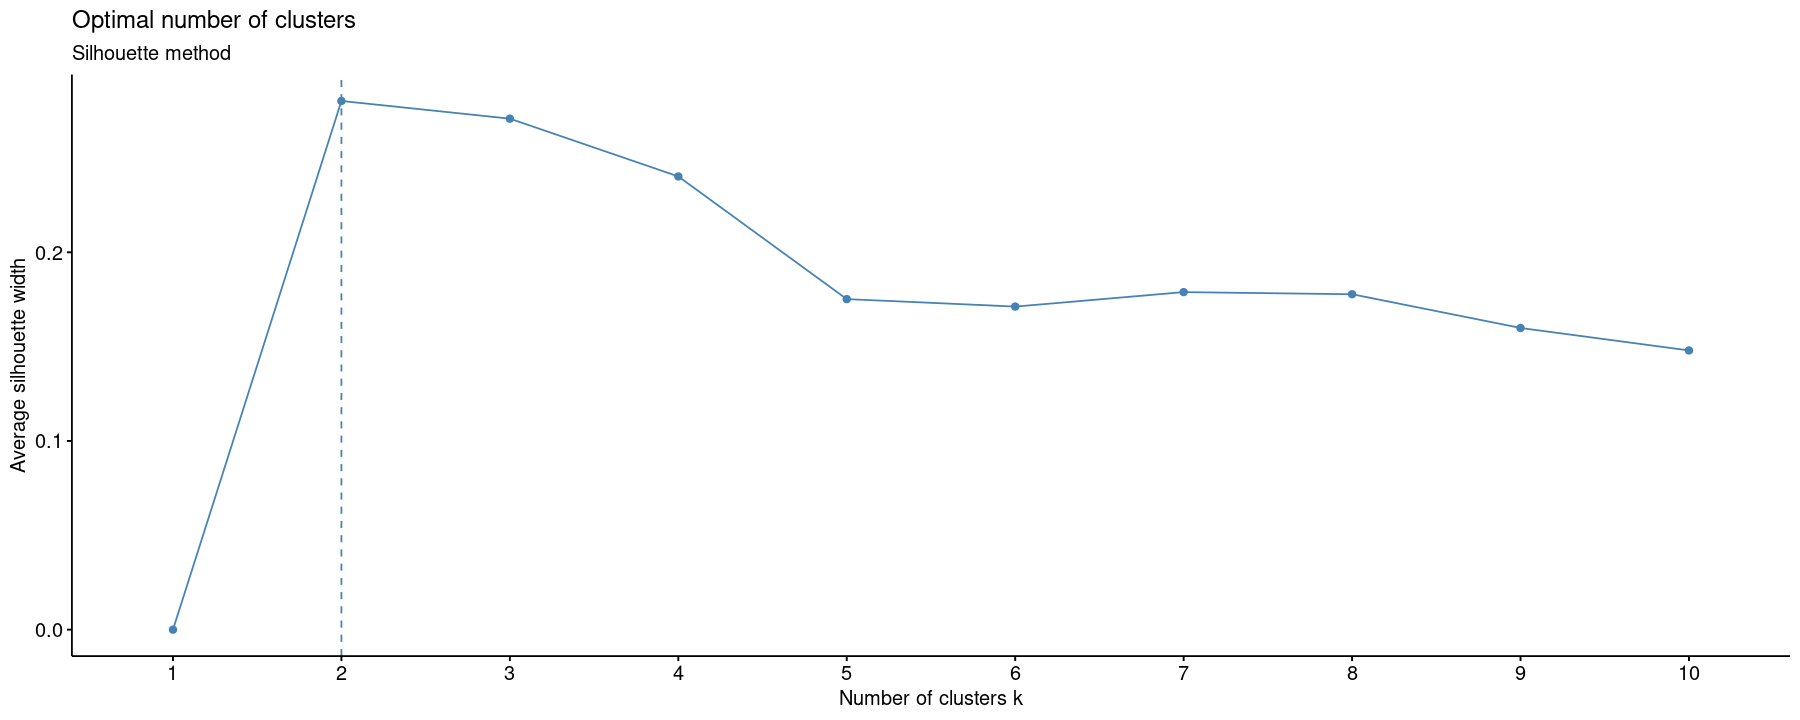

In [27]:
#Silhouette méthode
fviz_nbclust(velib2[,-169], kmeans, method = "silhouette")+
labs(subtitle = "Silhouette method") 

  cluster size ave.sil.width
1       1  288          0.21
2       2  380          0.21
3       3  521          0.35


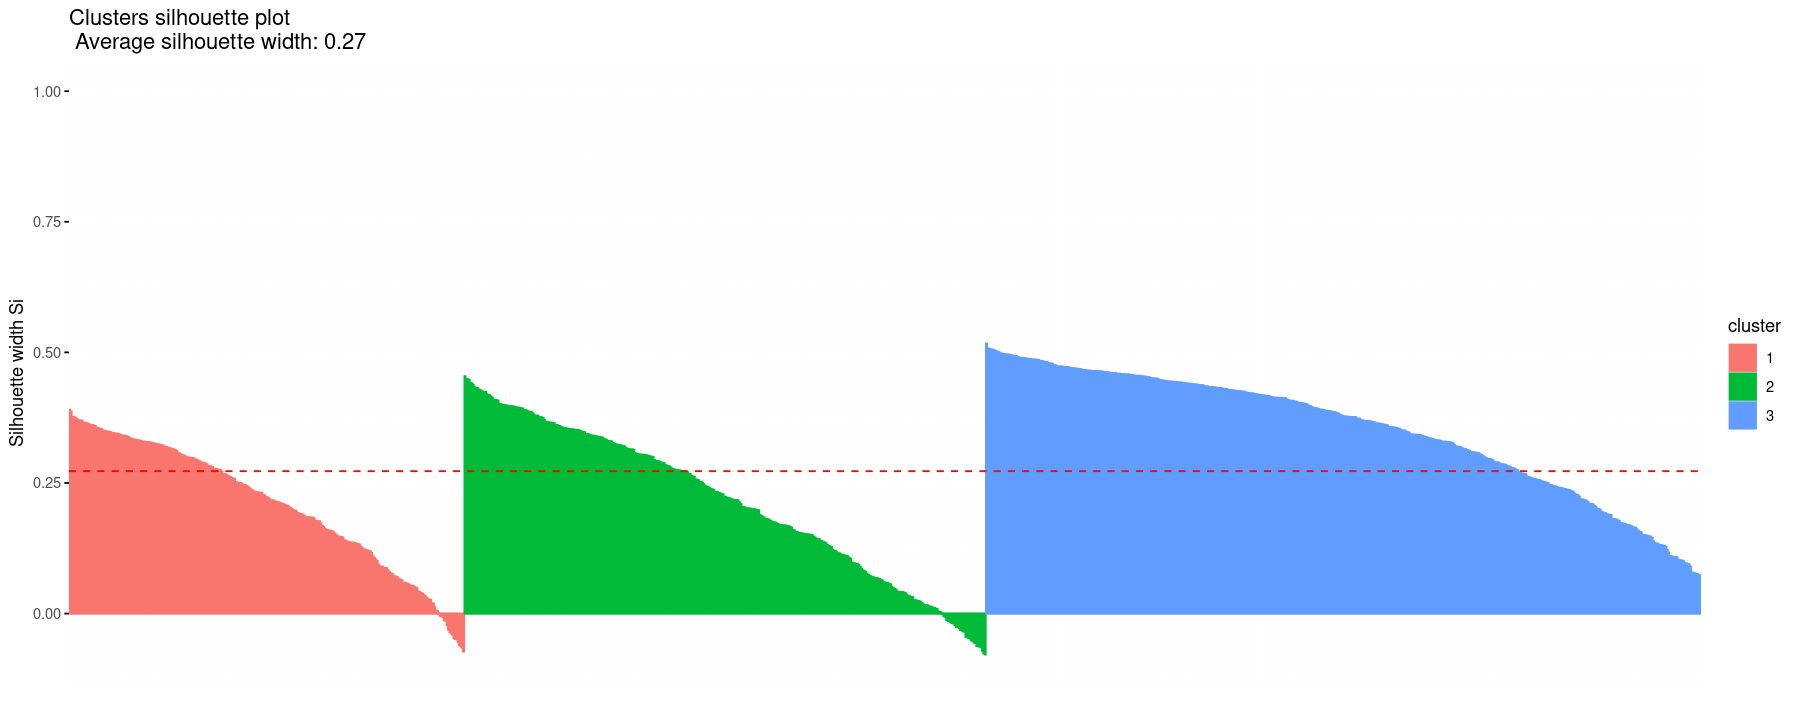

In [46]:
reskmeans = kmeans(velib2[,-169], centers=3) 
sil = silhouette(reskmeans$cluster, dist(velib2[,-169]))
fviz_silhouette(sil)

  cluster size ave.sil.width
1       1  721          0.33
2       2  468          0.21


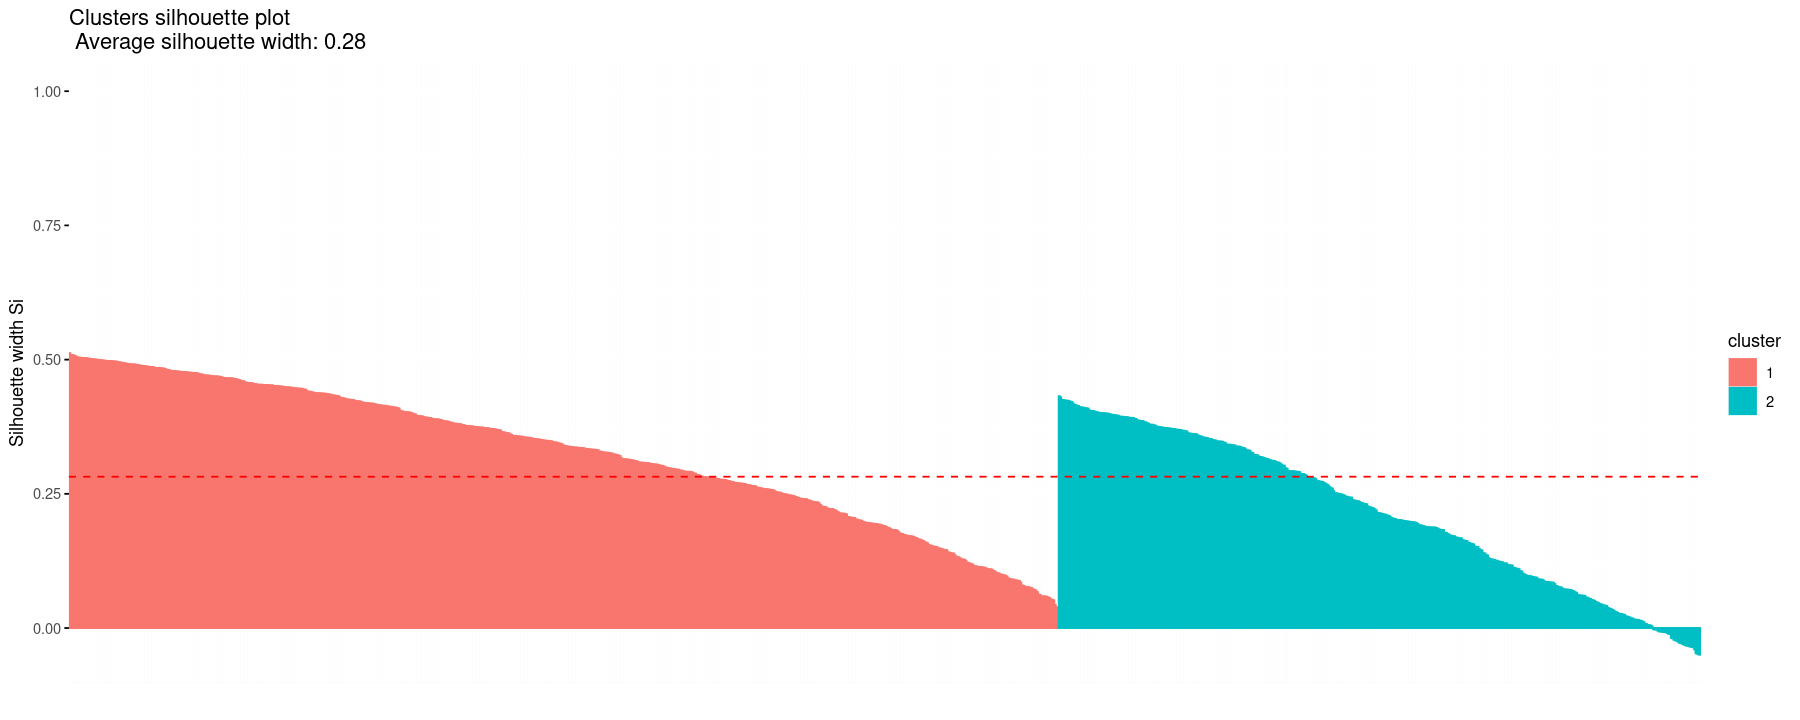

In [47]:
reskmeans = kmeans(velib2[,-169], centers=2) 
sil = silhouette(reskmeans$cluster, dist(velib2[,-169]))
fviz_silhouette(sil)

  cluster size ave.sil.width
1       1  441          0.34
2       2  234          0.22
3       3  238          0.13
4       4  276          0.19


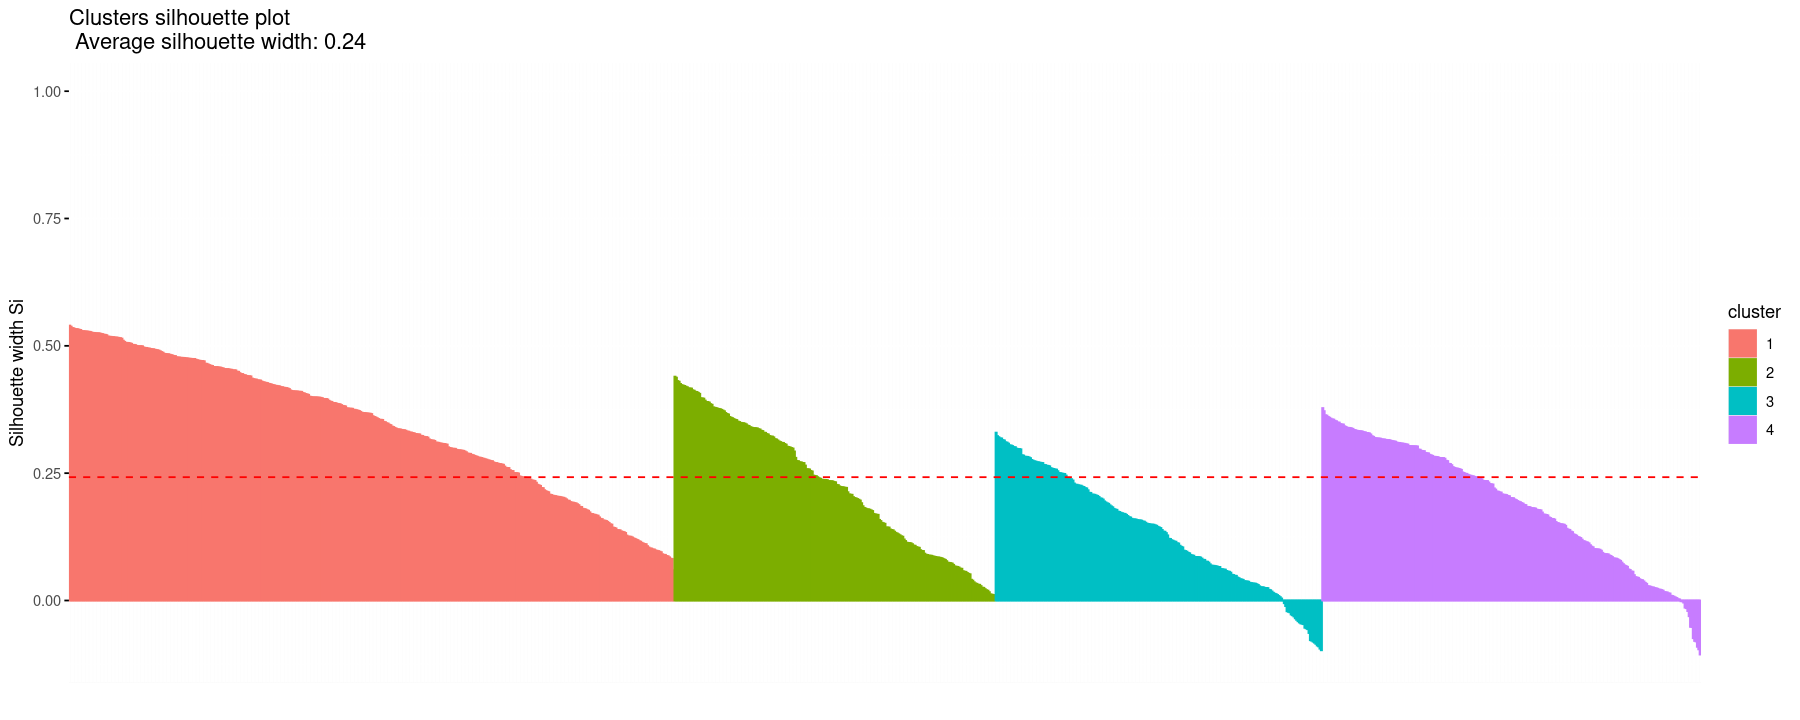

In [48]:
reskmeans = kmeans(velib2[,-169], centers=4) 
sil = silhouette(reskmeans$cluster, dist(velib2[,-169]))
fviz_silhouette(sil)

In [ ]:
On optera davantage pour 3 clusters.

In [49]:
reskmeans = kmeans(velib2[,-169], centers=3) 
reskmeans$cluster #donne pour chaque point le cluster auquel il appartient

EURYALE DEHAYNIN 
                                         2 
                                 LEMERCIER 
                                         3 
                           MEZIERES RENNES 
                                         1 
                                    FARMAN 
                                         1 
                          QUAI DE LA RAPEE 
                                         1 
                       CHOISY POINT D'IVRY 
                                         2 
                         PORTE DE VILLIERS 
                                         3 
           STALINGRAD (FONTENAY SOUS BOIS) 
                                         3 
                      GARE RER (JOINVILLE) 
                                         3 
                   MOUFFETARD EPEE DE BOIS 
                                         1 
                                 PELLEPORT 
                                         2 
                          TREMBLAY - INSEP 
                                         3 
                    RIVOLI MUSEE DU LOUVRE 
                                         1 
                                  EVANGILE 
                                         2 
                            HÔPITAL BICHAT 
                                         2 
                      PLACE DES TERNES - 5 
                                         2 
                                 BEAUBOURG 
                                         1 
                          PYRÉNÉES-DAGORNO 
                                         3 
                  BEAUBOURG PLACE MICHELET 
                                         1 
                          MALON (GENTILLY) 
                                         2 
                  CHEMIN VERT BEAUMARCHAIS 
                                         3 
                         MARCHE AUX FLEURS 
                                         1 
                   SAINT PHILIPPE DU ROULE 
                                         1 
             AVENUE DE LA PORTE D'ASNIÈRES 
                                         3 
                         WAGRAM COURCELLES 
                                         2 
                                     REPOS 
                                         2 
                                     VAVIN 
                                         2 
                             GAITE LYRIQUE 
                                         3 
                                    CLICHY 
                                         2 
                         PLACE ST AUGUSTIN 
                                         1 
                           MAINE LIANCOURT 
                                         2 
                                   CREVAUX 
                                         2 
                           MAIRIE DU 15EME 
                                         3 
                   GRENELLE VIOLET (PROP3) 
                                         3 
                          GERVAIS (PANTIN) 
                                         2 
                                   J DUPRE 
                                         2 
                        PERI 2 (MONTROUGE) 
                                         2 
                      PLACE ETIENNE PERNET 
                                         3 
                         VERDUN (SURESNES) 
                                         2 
                         PARIS (MONTREUIL) 
                                         1 
                             CONSERVATOIRE 
                                         3 
                                    DANTON 
                                         1 
                        CITÉ DE LA MUSIQUE 
                                         2 
      PLACE DU BATAILLON FRANCAIS DE L'ONU 
                                         2 
                         MARCEL (BAGNOLET) 
                                         2 
              BELLEVILLE PRE SAINT GERVAIS 
                      

In [56]:
velib2

1          2          3          4         
 EURYALE DEHAYNIN                0.03846154 0.03846154 0.07692308 0.03846154
 LEMERCIER                       0.47826087 0.47826087 0.47826087 0.43478261
 MEZIERES RENNES                 0.21818182 0.14545455 0.12727273 0.10909091
 FARMAN                          0.95238095 0.95238095 0.95238095 0.95238095
 QUAI DE LA RAPEE                0.92753623 0.81159420 0.73913043 0.72463768
 CHOISY POINT D'IVRY             0.16666667 0.16666667 0.16666667 0.16666667
 PORTE DE VILLIERS               0.38461538 0.38461538 0.35897436 0.35897436
 STALINGRAD (FONTENAY SOUS BOIS) 0.27450980 0.29411765 0.33333333 0.33333333
 GARE RER (JOINVILLE)            0.91111111 0.93333333 0.93333333 0.93333333
 MOUFFETARD EPEE DE BOIS         0.90476190 0.98412698 0.98412698 0.98412698
 PELLEPORT                       0.00000000 0.63636364 0.60606061 0.60606061
 TREMBLAY - INSEP                0.85714286 0.88571429 0.88571429 0.88571429
 RIVOLI MUSEE DU LOUVRE          0.41666667 0.41666667 0.04347826 0.04347826
 EVANGILE                        0.28571429 0.23809524 0.23809524 0.23809524
 HÔPITAL BICHAT                  0.08000000 0.12000000 0.16000000 0.16000000
 PLACE DES TERNES - 5            0.02380952 0.04761905 0.04761905 0.02380952
 BEAUBOURG                       0.44444444 0.38888889 0.33333333 0.38888889
 PYRÉNÉES-DAGORNO                0.57142857 0.71428571 0.61904762 0.61904762
 BEAUBOURG PLACE MICHELET        0.07142857 0.03571429 0.00000000 0.00000000
 MALON (GENTILLY)                0.36666667 0.40000000 0.56666667 0.56666667
 CHEMIN VERT BEAUMARCHAIS        0.82352941 0.86274510 0.90196078 0.88235294
 MARCHE AUX FLEURS               0.45833333 0.45833333 0.37500000 0.41666667
 SAINT PHILIPPE DU ROULE         0.11111111 0.11111111 0.07407407 0.07407407
 AVENUE DE LA PORTE D'ASNIÈRES   0.22222222 0.27777778 0.22222222 0.25000000
 WAGRAM COURCELLES               0.48780488 0.63414634 0.63414634 0.58536585
 REPOS                           0.06060606 0.09090909 0.09090909 0.09090909
 VAVIN                           0.04347826 0.04347826 0.00000000 0.00000000
 GAITE LYRIQUE                   0.78260870 0.82608696 0.78260870 0.78260870
 CLICHY                          0.00000000 0.00000000 0.09375000 0.31250000
 PLACE ST AUGUSTIN               0.15000000 0.05000000 0.05000000 0.05000000
⋮                                ⋮          ⋮          ⋮          ⋮         
 SARETTE GENERAL LECLERC         0.22727273 0.40909091 0.36363636 0.22727273
 REPUBLIQUE 2 (MONTREUIL)        0.44444444 0.44444444 0.48148148 0.48148148
 DECAEN                          0.97368421 0.97368421 1.00000000 0.97368421
 RASPAIL SCHOELCHER              0.02173913 0.02173913 0.02173913 0.45652174
 IVRY POINTE D'IVRY              0.50000000 0.62500000 0.68750000 0.56250000
 PORTE DE LA VILLETTE            0.03703704 0.00000000 0.03703704 0.03703704
 DHALENNE (SAINT OUEN)           0.72727273 0.81818182 0.81818182 0.81818182
 BEAUBOURG RAMBUTEAU             0.19230769 0.07692308 0.11538462 0.11538462
 RAYMOND LOSSERAND               0.20833333 0.29166667 0.65217391 0.60869565
 PYRENEES                        0.07692308 0.84615385 0.80769231 0.61538462
 GARE ROUTIERE ( SAINT CLOUD)    0.12244898 0.14285714 0.12244898 0.12244898
 SEINE FLANDRE                   0.00000000 0.00000000 0.00000000 0.00000000
 LEDRU ROLLIN (SURESNES)         0.41666667 0.41666667 0.41666667 0.41666667
 RIVOLI MAIRIE DU 1ER            0.80000000 0.75000000 0.10000000 0.10000000
 BOUSSINGAULT - TOLBIAC          0.25531915 0.29787234 0.31914894 0.31914894
 CHARONNE                        1.00000000 1.00000000 1.00000000 1.00000000
 MADELEINE                       0.27027027 0.32432432 0.21621622 0.21621622
 OKABE (LE KREMLIN-BICETRE)      0.00000000 0.00000000 0.04166667 0.08333333
 PORTE DE VINCENNES BIS          1.00000000 0.93750000 1.00000000 1.00000000
 GAMBETTA MARTIN NADAUD          0.00000000 0.04081633 0.42857143 0.40816327
 SAINT MARCEL                

In [58]:
fviz_cluster(reskmeans, data=velib2[,-169], ellipse.type="norm", labelsize=8, geom=c("point"))

Warning message:
“non-unique values when setting 'row.names': ‘ ALEXANDRE DUMAS’, ‘ AQUEDUC’, ‘ BASTILLE’, ‘ BELLEVILLE’, ‘ BOURSE DU TRAVAIL’, ‘ BROCHANT’, ‘ CHERCHE MIDI’, ‘ CLICHY’, ‘ DODU’, ‘ FAURE (AUBERVILLIERS)’, ‘ FRANCE (LEVALLOIS)’, ‘ GARE D'AUSTERLITZ’, ‘ GARE DE L'EST’, ‘ JOURDAIN’, ‘ LACEPEDE’, ‘ LEGENDRE’, ‘ PARC DE BELLEVILLE’, ‘ PORT ROYAL’, ‘ PORTE DE BAGNOLET’, ‘ PORTE DE SAINT OUEN’, ‘ PORTE DES LILAS’, ‘ RICHARD LENOIR’, ‘ SAINT AUGUSTIN’, ‘ SAINT HONORE’, ‘ SAINT MARCEL’, ‘ WILSON (LEVALLOIS)’”


ERROR: Error in `.rowNamesDF<-`(x, value = value): les duplications dans 'row.names' ne sont pas autorisées


In [51]:
reskmeans = kmeans(velib2[,-169], centers=3) 
fviz_cluster(reskmeans,velib2[,-169],ellipse.type="norm")

Warning message:
“non-unique values when setting 'row.names': ‘ ALEXANDRE DUMAS’, ‘ AQUEDUC’, ‘ BASTILLE’, ‘ BELLEVILLE’, ‘ BOURSE DU TRAVAIL’, ‘ BROCHANT’, ‘ CHERCHE MIDI’, ‘ CLICHY’, ‘ DODU’, ‘ FAURE (AUBERVILLIERS)’, ‘ FRANCE (LEVALLOIS)’, ‘ GARE D'AUSTERLITZ’, ‘ GARE DE L'EST’, ‘ JOURDAIN’, ‘ LACEPEDE’, ‘ LEGENDRE’, ‘ PARC DE BELLEVILLE’, ‘ PORT ROYAL’, ‘ PORTE DE BAGNOLET’, ‘ PORTE DE SAINT OUEN’, ‘ PORTE DES LILAS’, ‘ RICHARD LENOIR’, ‘ SAINT AUGUSTIN’, ‘ SAINT HONORE’, ‘ SAINT MARCEL’, ‘ WILSON (LEVALLOIS)’”


ERROR: Error in `.rowNamesDF<-`(x, value = value): les duplications dans 'row.names' ne sont pas autorisées
